In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
import time
from subprocess import check_output

In [5]:
#load it back:
df = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')
df.head()

SUBJECTn     CLIN  SEX        V1        V2        V3        V4        V5  \
0    BC_10  Healthy  NaN  0.220240  0.023630  0.459240  0.232679  0.055238   
1    BC_11  Healthy  NaN  0.209268  0.026029  0.476099  0.235566  0.044202   
2    BC_12  Healthy  NaN  0.205156  0.024936  0.415683  0.298063  0.031972   
3    BC_13  Healthy  NaN  0.201297  0.046151  0.420261  0.275598  0.049830   
4    BC_14  Healthy  NaN  0.246696  0.021840  0.452630  0.223807  0.046810   

         V6        V7          ...            CDR3_AA_GRAVY.quter  \
0  0.008488  0.000484          ...                           -1.0   
1  0.008683  0.000154          ...             -0.995833333333333   
2  0.010342  0.013848          ...             -0.986666666666667   
3  0.006616  0.000247          ...                           -1.0   
4  0.007985  0.000231          ...             -0.963157894736842   

     CDR3_AA_GRAVY.tail  CDR3_AA_LENGTH.mean  CDR3_AA_LENGTH.str  \
0  -0.17333333333333306   15.566583363084613  3.8140400573600988   
1    -0.123076923076923   15.436090515166105  3.6172652136720735   
2   -0.1459935897435895   16.115639999005246   4.112519249025375   
3  -0.12222222222222195   15.440365905091548   3.732484244150953   
4    -0.123076923076923   15.976363377474014  3.9563694966376097   

   CDR3_AA_LENGTH.quter  CDR3_AA_LENGTH.tail  CDR3_AA_POLARITY.mean  \
0                  13.0                 18.0      8.413516101784207   
1                  13.0                 18.0      8.482599018559231   
2                  13.0                 19.0      8.439949841021718   
3                  13.0                 18.0      8.470984259102124   
4                  13.0                 19.0      8.441183495909993   

   CDR3_AA_POLARITY.str  CDR3_AA_POLARITY.quter  CDR3_AA_POLARITY.tail  
0    0.5214524393531481        8.04705882352941       8.75454545454545  
1   0.49800555512505285        8.13529411764706      8.805882352941179  
2    0.4908470198259828                     8.1       8.75333333333333  
3    0.5001470227375485                   8.125                8.79375  
4    0.4968433667652791       8.091205533596842                   8.76  

[5 rows x 362 columns]

In [17]:
df.rename({'SUBJECTn':'SAMP','CLIN':'GROUP'}, inplace = True,axis='columns')

In [18]:
# feature names as a list
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['SAMP', 'GROUP', 'SEX', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       ...
       'CDR3_AA_GRAVY.quter', 'CDR3_AA_GRAVY.tail', 'CDR3_AA_LENGTH.mean',
       'CDR3_AA_LENGTH.str', 'CDR3_AA_LENGTH.quter', 'CDR3_AA_LENGTH.tail',
       'CDR3_AA_POLARITY.mean', 'CDR3_AA_POLARITY.str',
       'CDR3_AA_POLARITY.quter', 'CDR3_AA_POLARITY.tail'],
      dtype='object', length=362)


In [69]:
# y includes our labels and x includes our features
data = df
y = data.GROUP  # Healthy or Celiac
y2 = data.SEX   # M or F
list = ['SAMP','GROUP','SEX']
x = data.drop(list,axis = 1 )
x.head()
x = x.astype(float)

Number of Healthy :  47
Number of Celiac :  51


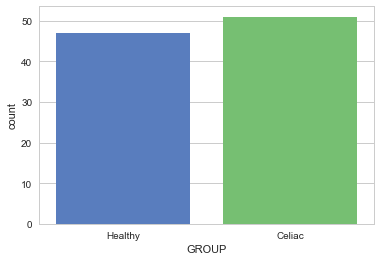

In [70]:
ax = sns.countplot(y,label="Count")       # H = 15, C = 49
C, H = y.value_counts()
print('Number of Healthy : ',H)
print('Number of Celiac : ',C)

Number of FEMALE :  46
Number of MALE :  18


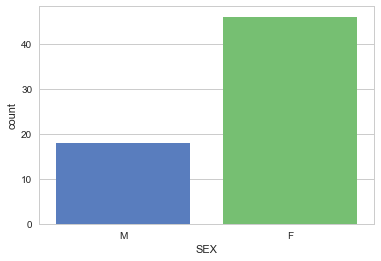

In [72]:
ax = sns.countplot(y2,label="Count")       # H = 15, C = 49
F, M = y2.value_counts()
print('Number of FEMALE : ',F)
print('Number of MALE : ',M)

In [73]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [74]:
x.describe()

V1         V2         V3         V4         V5         V6         V7         D1         D2         D3         D4         D5         D6         D7      V1-18       V1-2      V1-24       V1-3   V1-38-4      V1-45      V1-46      V1-58      V1-68      V1-69    V1-69-2       V1-8     V1-NL1  V1/OR15-1  V1/OR15-2  V1/OR15-3  V1/OR15-4  V1/OR15-5  V1/OR15-9     V2-10      V2-26       V2-5      V2-70  V2/OR16-5      V3-11      V3-13      V3-15     V3-16      V3-19      V3-20      V3-21      V3-22      V3-23      V3-30    V3-30-3  V3-30-33      V3-33      V3-35      V3-38   V3-38-3      V3-43      V3-47      V3-48      V3-49      V3-52      V3-53     V3-54      V3-64      V3-66    V3-69-1       V3-7      V3-71      V3-72      V3-73      V3-74       V3-9    V3-NL1  V3/OR15-7  V3/OR16-10  V3/OR16-12  V3/OR16-13  V3/OR16-15  V3/OR16-6  V3/OR16-8  V3/OR16-9      V4-28    V4-30-2    V4-30-4      V4-31      V4-34    V4-38-2      V4-39       V4-4      V4-55      V4-59      V4-61  \
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  92.000000  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000  97.000000  2.000000  84.000000  98.000000  97.000000  11.000000  98.000000  50.000000  96.000000  14.000000  15.000000  26.000000  32.000000  10.000000   6.000000   7.000000  1.000000  98.000000  98.000000  98.000000   1.000000  98.000000  98.000000  98.000000  8.000000  43.000000  96.000000  98.000000  12.000000  98.000000  98.000000  88.000000  2.000000  98.000000  35.000000  21.000000  8.000000  96.000000  19.000000  98.000000  98.000000  47.000000  98.000000  1.000000  98.000000  95.000000  35.000000  98.000000  21.000000  98.000000  97.000000  98.000000  79.000000  5.000000   1.000000    3.000000    4.000000    1.000000   17.000000   7.000000   4.000000   9.000000  90.000000  96.000000  73.000000  97.000000  98.000000  72.000000  97.000000  98.000000  78.000000  98.000000  97.000000   
mean    0.196356   0.029925   0.486402   0.237721   0.039827   0.006685   0.003285   0.108151   0.156763   0.327803   0.088054   0.090951   0.197571   0.007210   0.031015   0.029408   0.009098   0.010858  0.000054   0.000170   0.021776   0.003413   0.000033   0.074200   0.001950   0.015865   0.000060   0.000025   0.000044   0.000037   0.000035   0.000042   0.000033  0.000025   0.007567   0.017386   0.004971   0.000052   0.021272   0.005028   0.027524  0.000026   0.000048   0.003744   0.052239   0.000091   0.113582   0.050145   0.029474  0.000031   0.038422   0.000048   0.000055  0.000043   0.005798   0.000051   0.031067   0.011990   0.000060   0.012540  0.000018   0.007784   0.009854   0.000061   0.020846   0.000034   0.001497   0.006078   0.009376   0.039140  0.000052   0.000029    0.000031    0.000032    0.000032    0.000052   0.000030   0.000030   0.000026   0.000217   0.005151   0.009689   0.022234   0.068475   0.010905   0.060756   0.018108   0.000088   0.035336   0.013231   
std     0.039813   0.009526   0.053478   0.040164   0.012054   0.001890   0.005000   0.013449   0.029768   0.024401   0.011275   0.010442   0.024319   0.001663   0.006347   0.011628   0.003194   0.007373  0.000028   0.000086   0.006318   0.001238   0.000019   0.028918   0.000935   0.011060   0.000085   0.000015   0.000025   0.000016   0.000013   0.000053   0.000010       NaN   0.002363   0.007527   0.002428        NaN   0.005943   0.001760   0.007061  0.000011   0.000035   0.003029   0.010482   0.000190   0.030190   0.019422   0.020812  0.000011   0.015160   0.000030   0.000058  0.000019   0.004377   0.000095   0.010857   0.003350   0.000039   0.004515       NaN   0.004912   0.008775   0.000069   0.006181   0.000019   0.000456   0.002289   0.002287   0.014511  0.000054        NaN    0.000016    0.000013         NaN    0.000088   0.000012   0.000018   0.000005   0.000120   0.003720   0.006096   0.011227   0.025141   0.011558   0.020758   0.005726   0.000072   0.012231   0.012337   
min     0.103290   0.014028   

In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Columns: 359 entries, V1 to CDR3_AA_POLARITY.tail
dtypes: float64(359)
memory usage: 278.1 KB


#### Therefore do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton? The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.

# Visualization

In [ ]:
# NO NEED !!
e2 = data
#replace '.1','.2','.4','.6' to 'mean','str','25%' ='quter' ,'75%' ='tail'
e2.columns = e2.columns.str.replace(".mean","_mean")
e2.columns = e2.columns.str.replace( ".str","_str")
e2.columns = e2.columns.str.replace( ".quter","_quater")
e2.columns = e2.columns.str.replace(".tail","_tail")
e2.head()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

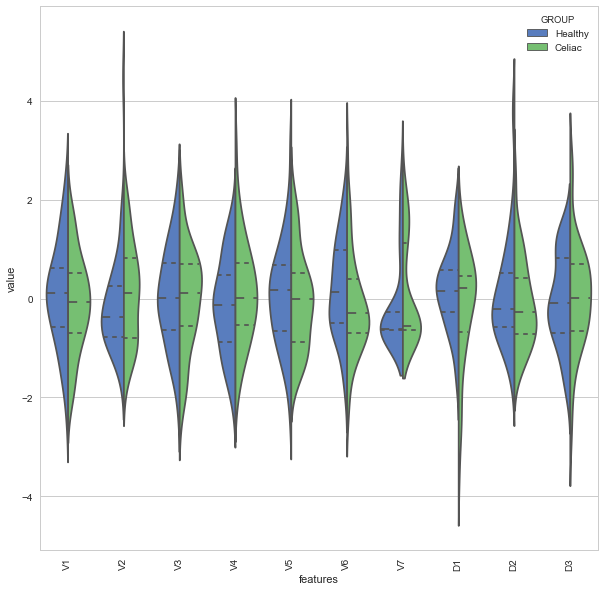

In [76]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="GROUP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

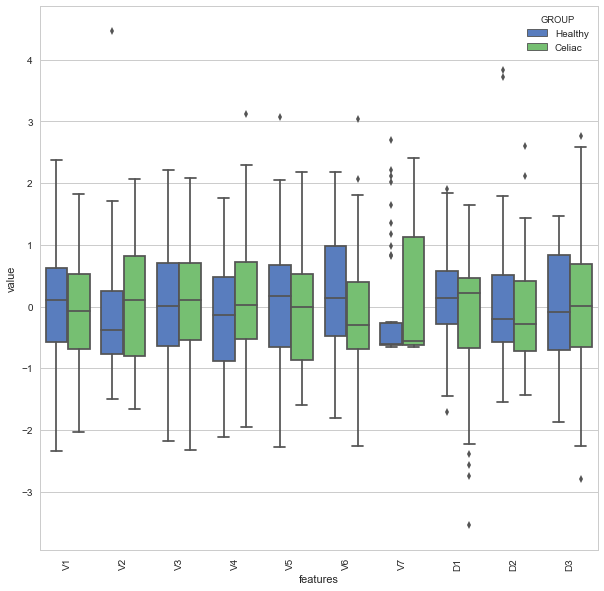

In [77]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="GROUP", data=data)
plt.xticks(rotation=90)

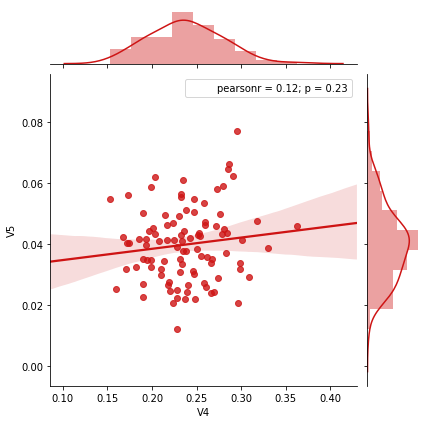

In [41]:
#new
sns.jointplot(x.loc[:,'V4'], x.loc[:,'V5'], kind="regg", color="#ce1414")

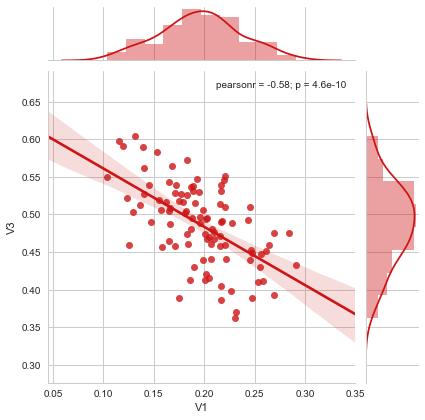

In [78]:
sns.jointplot(x.loc[:,'V1'], x.loc[:,'V3'], kind="regg", color="#ce1414")

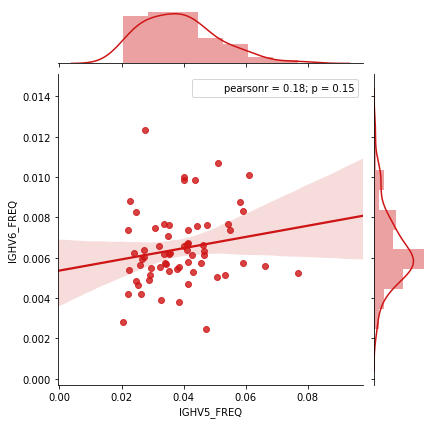

In [15]:
sns.jointplot(x.loc[:,'IGHV5_FREQ'], x.loc[:,'IGHV6_FREQ'], kind="regg", color="#ce1414")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


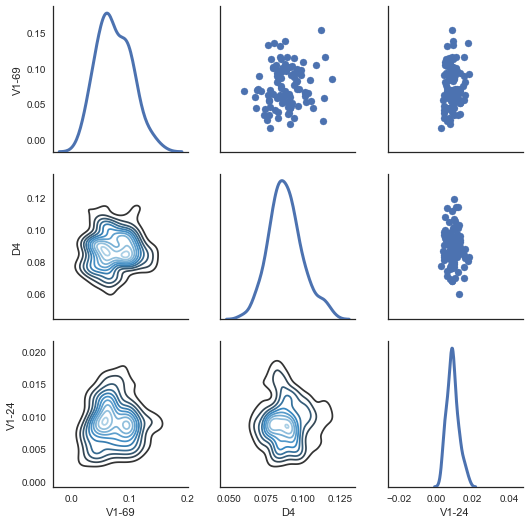

In [79]:
# SEE CORRELATION BETWEEN 3 FEATURES
sns.set(style="white")
df = x.loc[:,['V1-69','D4','V1-24']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

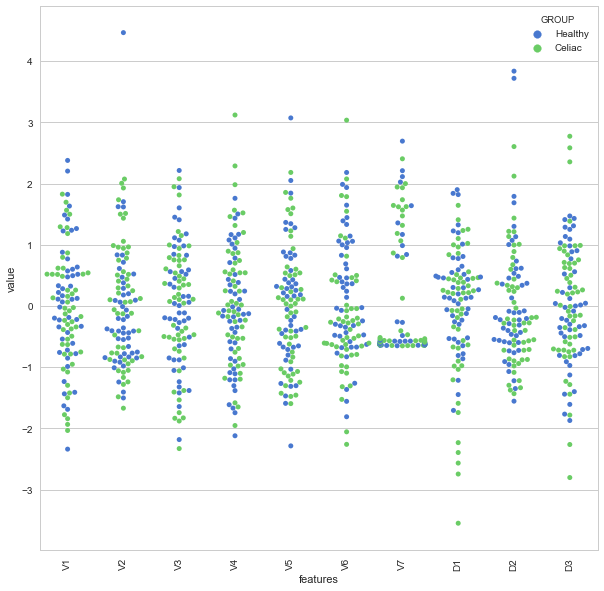

In [80]:
# see variance more clear.
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="GROUP", data=data)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

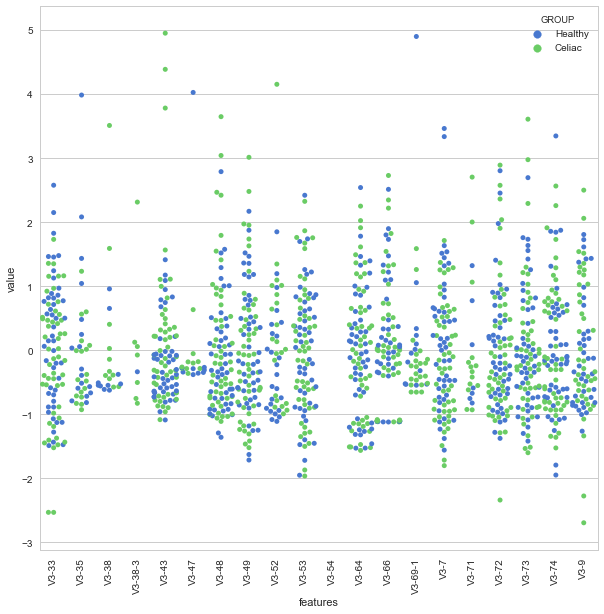

In [81]:
# see variance more clear.
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,50:70]],axis=1)
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="GROUP", data=data)

plt.xticks(rotation=90)

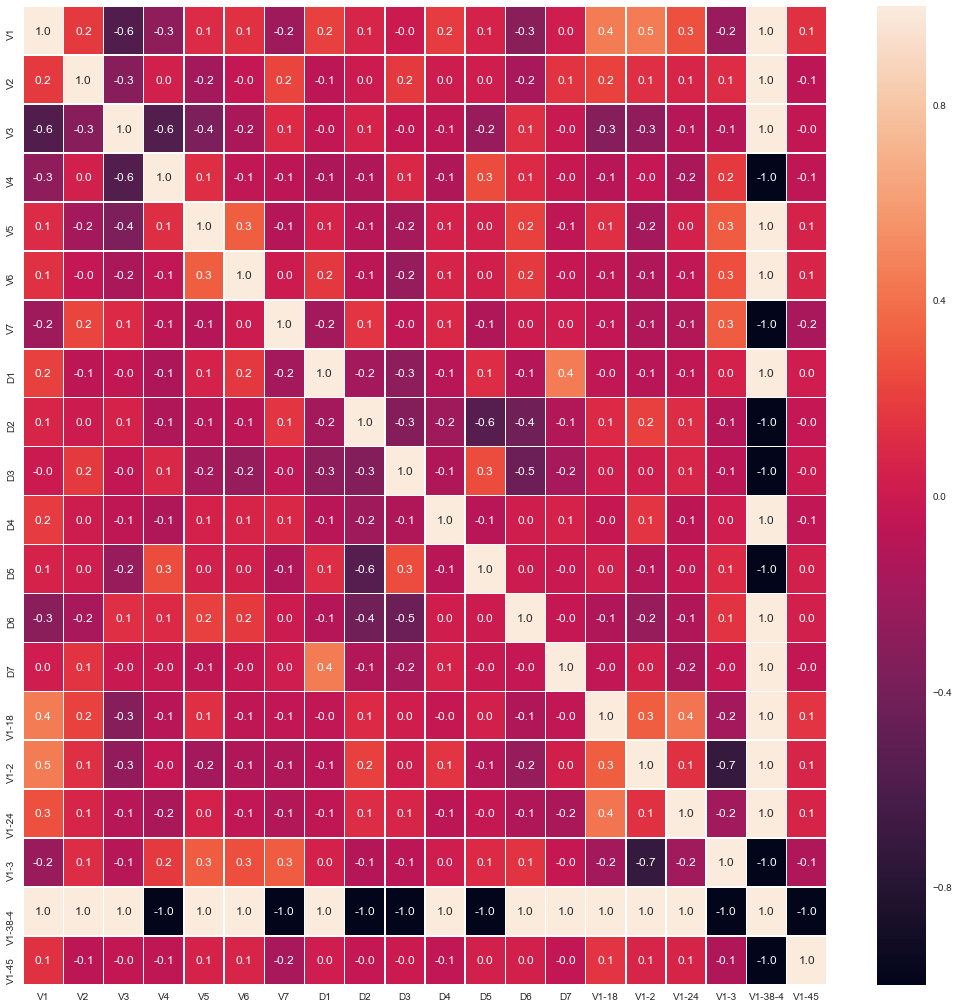

In [82]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
t = x.iloc[:,0:20]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

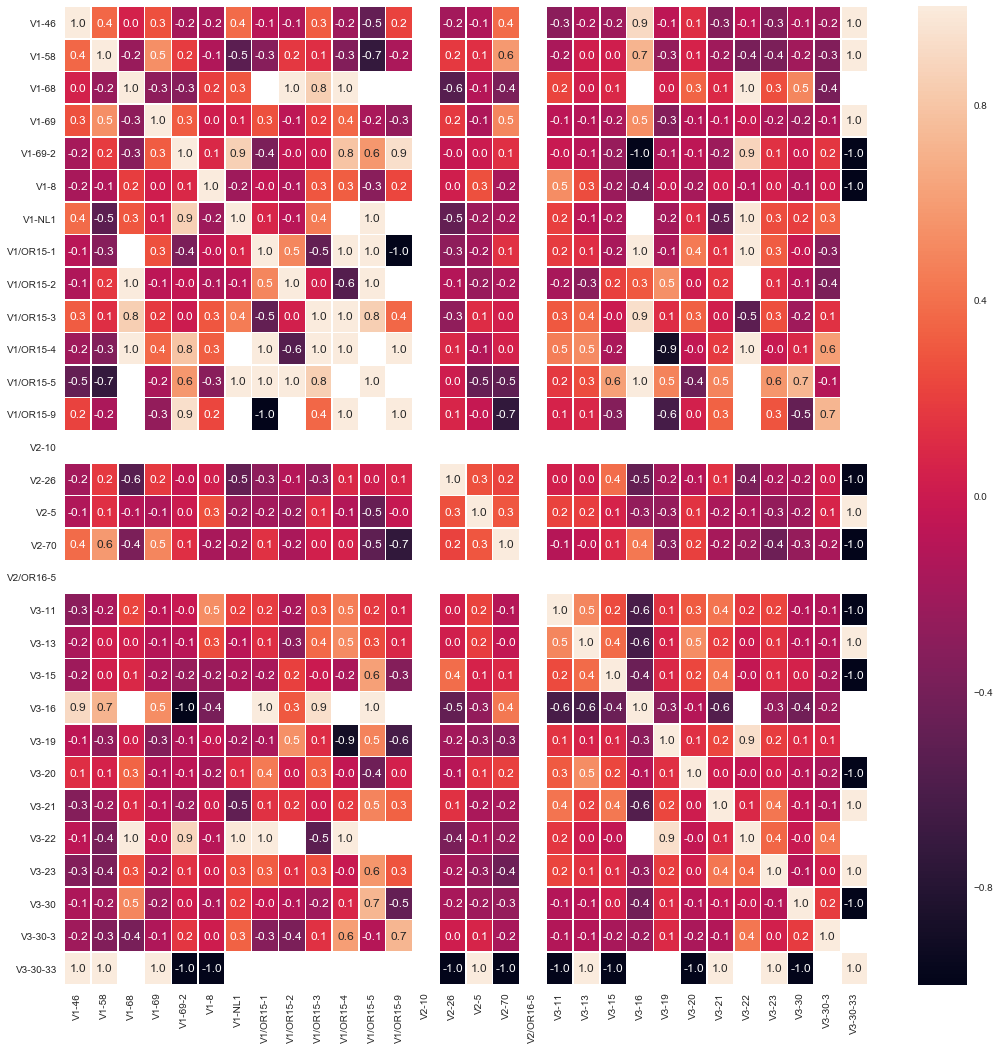

In [83]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
t = x.iloc[:,20:50]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# looking on feature importance after random forest

In [2]:
feature_select = pd.read_pickle('feature_importance_1')
feature_select.head()

FEATURE  IMPORTANCE
246  V2_J2_VJ    0.069149
125     D6-19    0.050176
86       V4-4    0.048836
110     D3-10    0.047156
83      V4-34    0.032119

In [3]:
feature_select = feature_select.reset_index(drop=True)

In [4]:
feature_select

FEATURE  IMPORTANCE
0                V2_J2_VJ    0.069149
1                   D6-19    0.050176
2                    V4-4    0.048836
3                   D3-10    0.047156
4                   V4-34    0.032119
5                V2_J4-VJ    0.031588
6                    V1-8    0.031068
7                      J4    0.029499
8                   D7-27    0.028893
9                V1_J4_VJ    0.027024
10                  V1-58    0.026280
11               V4_J3-VJ    0.026042
12                  D6-13    0.023433
13               V2_J1-VJ    0.021826
14               V1_J2-VJ    0.019205
15                  D3-16    0.017698
16                  69-JL    0.017223
17                  21-JL    0.016919
18               V1_J5_VJ    0.016906
19                   9-JL    0.015886
20              V4/OR15-8    0.015797
21                  V3-19    0.015422
22               V2_J2-VJ    0.015214
23               V6_J4-VJ    0.015171
24             D2/OR15-2a    0.014865
25                   6-JL    0.014835
26                  56-JL    0.014513
27               V1_J4-VJ    0.013868
28               V2_J5_VJ    0.013008
29                   V1-2    0.012969
..                    ...         ...
39                  45-JL    0.008478
40                  V4-31    0.008452
41                  V3-38    0.008385
42               V7_J6_VJ    0.008156
43                     V1    0.007549
44  CDR3_AA_AROMATIC.mean    0.007513
45               V2_J6-VJ    0.006762
46                     D3    0.006646
47               V3_J1-VJ    0.005644
48                 V7-4-1    0.005470
49                  D6-25    0.005452
50                  33-JL    0.005449
51                  V3-23    0.005441
52                  52-JL    0.005375
53                  V3-33    0.005353
54               V1_J3_VJ    0.005210
55                  V3-47    0.005190
56                  60-JL    0.005190
57                   D6-6    0.005131
58                 114-JL    0.005078
59                     V7    0.005063
60               V7_J5_VJ    0.004938
61             D5/OR15-5a    0.004886
62                   D1-7    0.004843
63               V4_J1-VJ    0.004515
64                     D5    0.004515
65               V7_J6-VJ    0.004515
66               V6_J4_VJ    0.003775
67                  48-JL    0.003757
68                  D5-24    0.001651

[69 rows x 2 columns]

In [132]:
feature_list = feature_select.loc[:,'FEATURE']
feature_list = feature_list.values
feature_list

array(['V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'],
      dtype=object)

In [112]:
feature_list[1]

'D6-19'

## feature_selected visualize 1

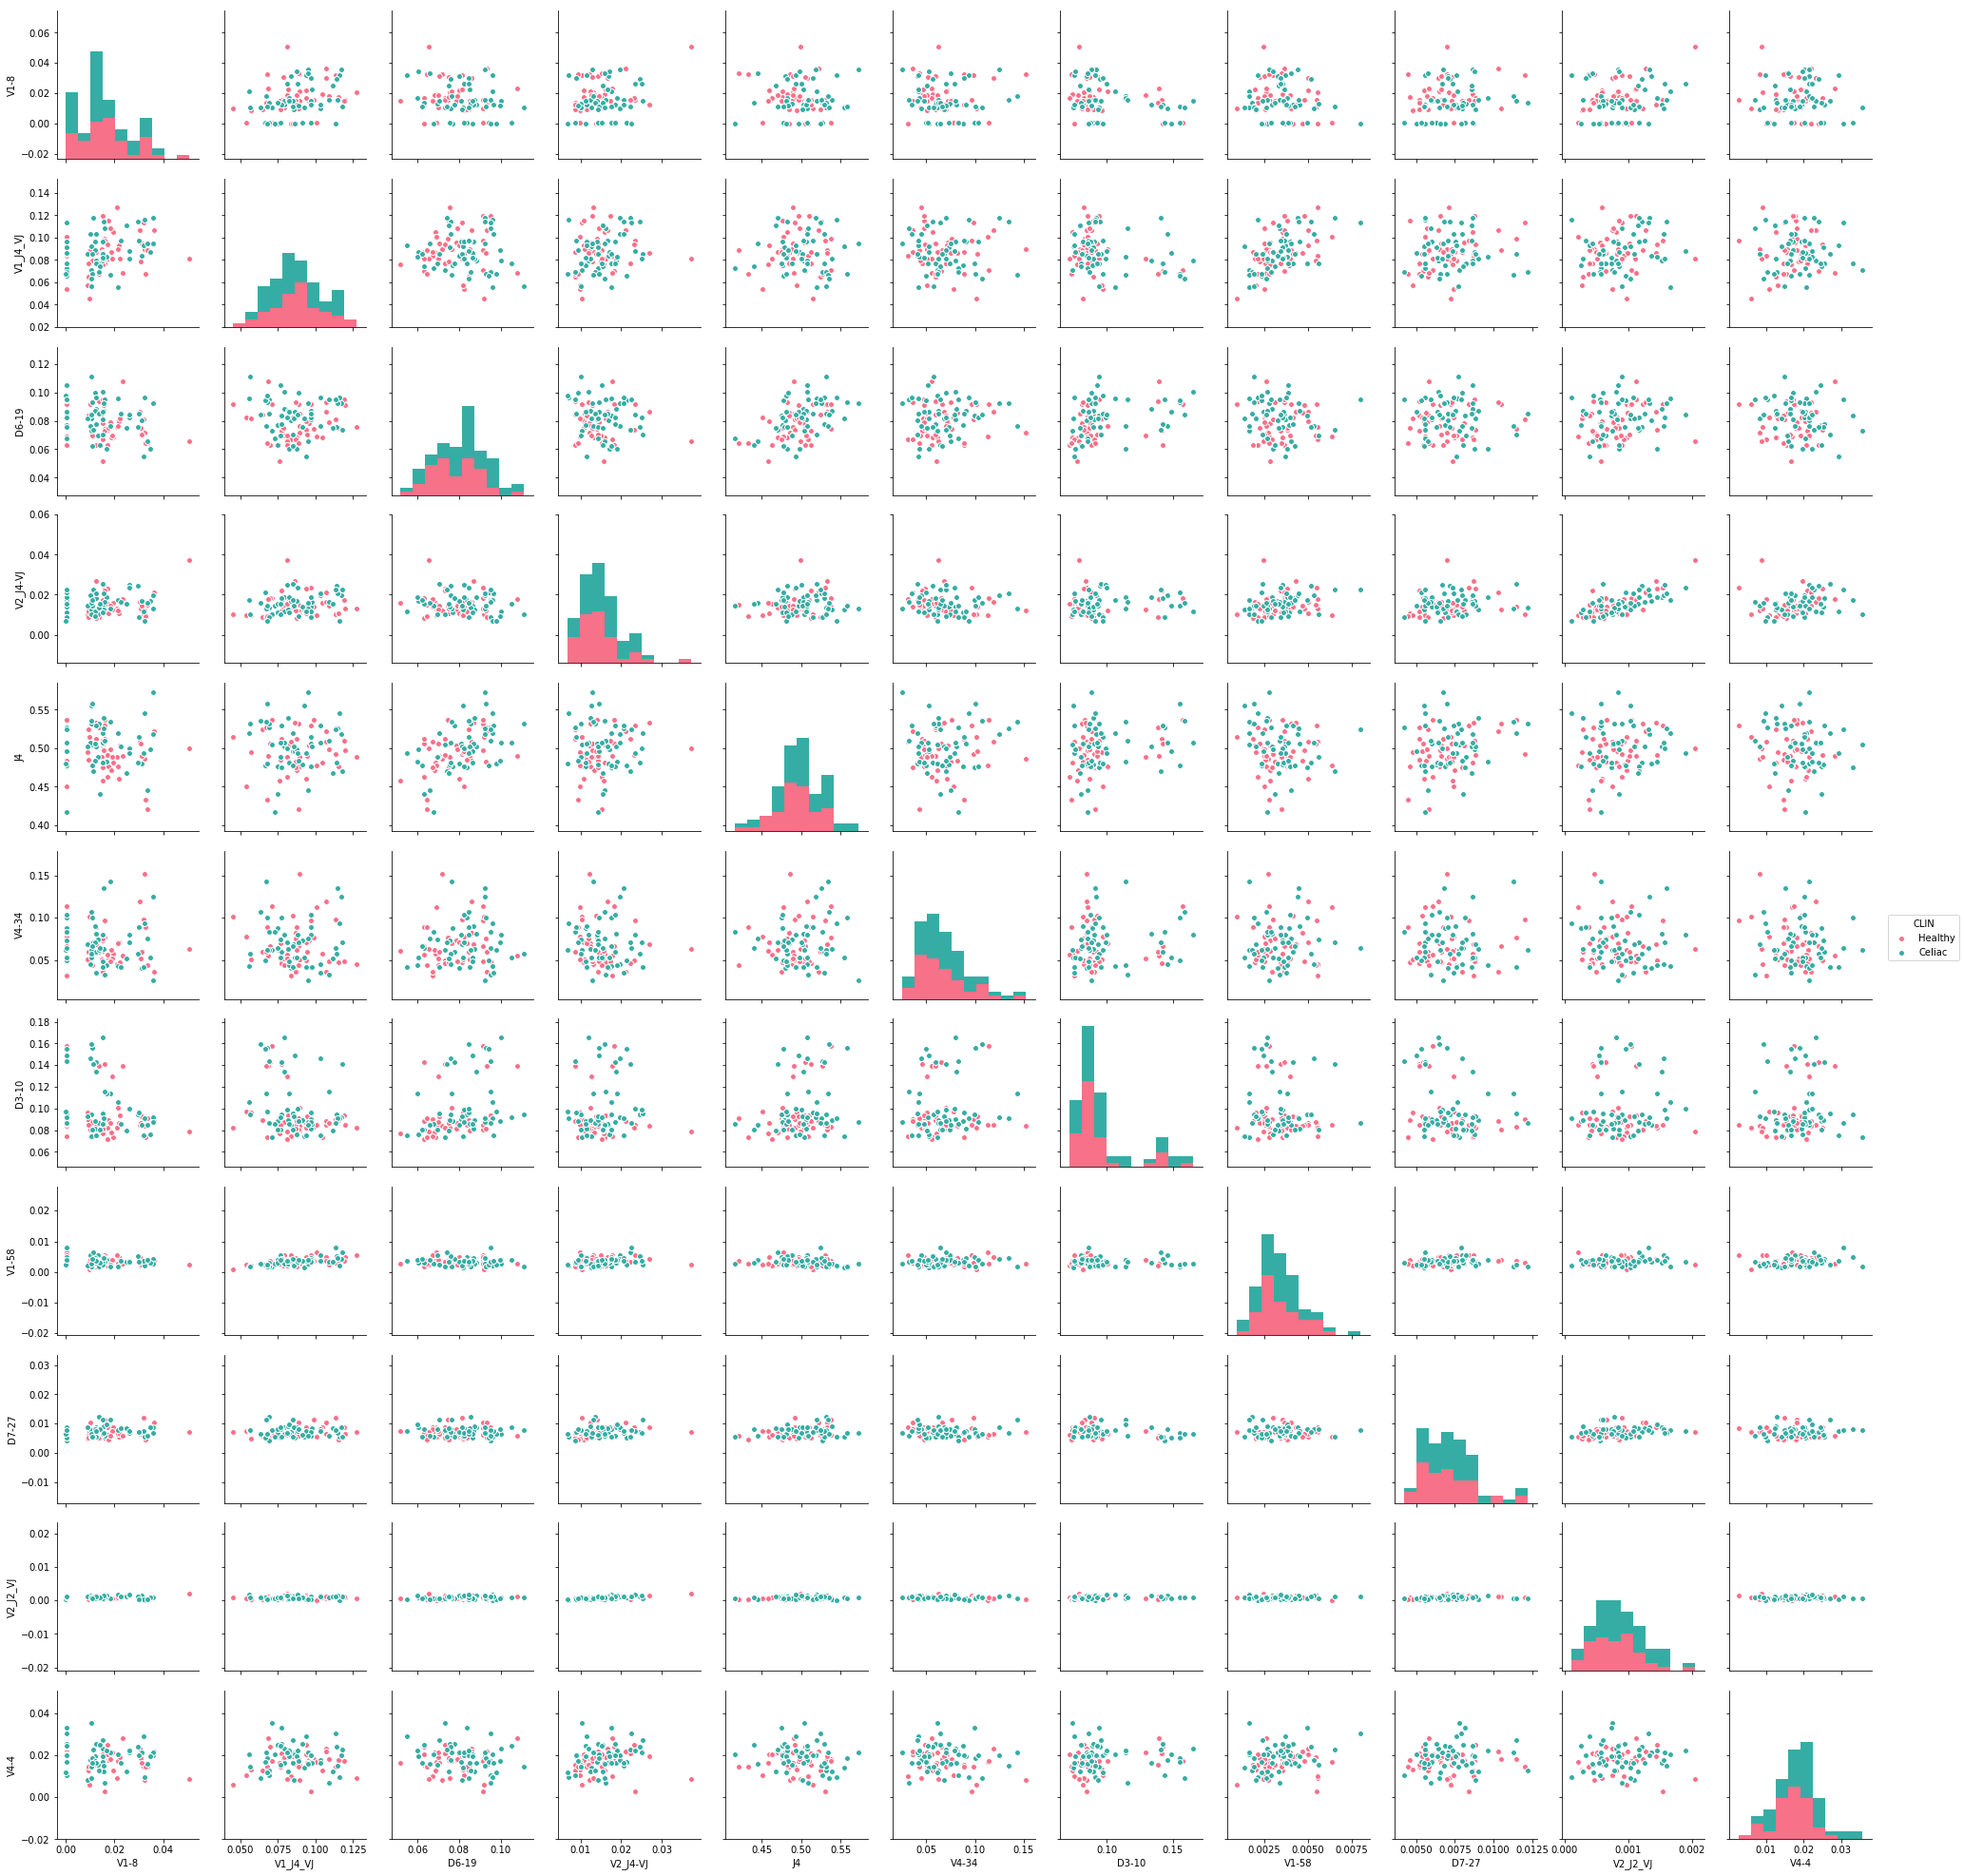

In [9]:
sns.pairplot(df.loc[:,{'CLIN','V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58'
 }],hue='CLIN',palette='husl')

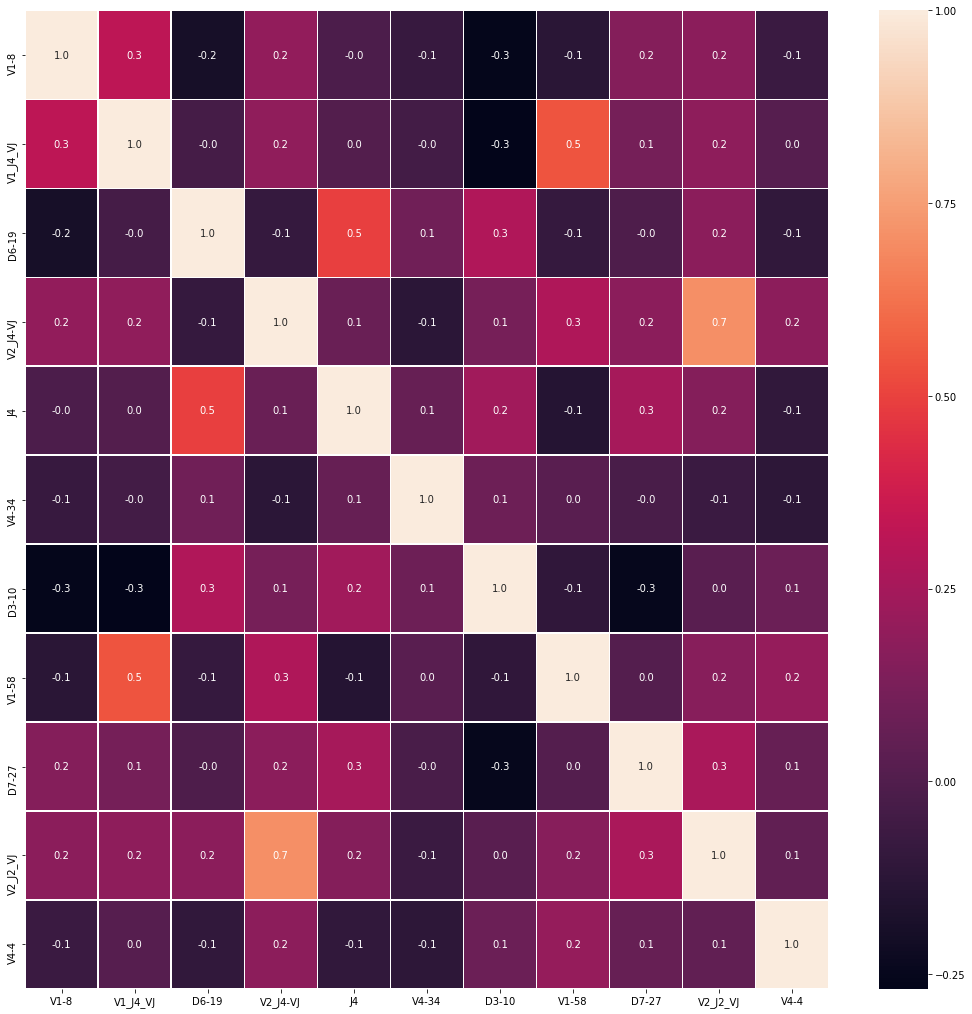

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
t = df.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58'}]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

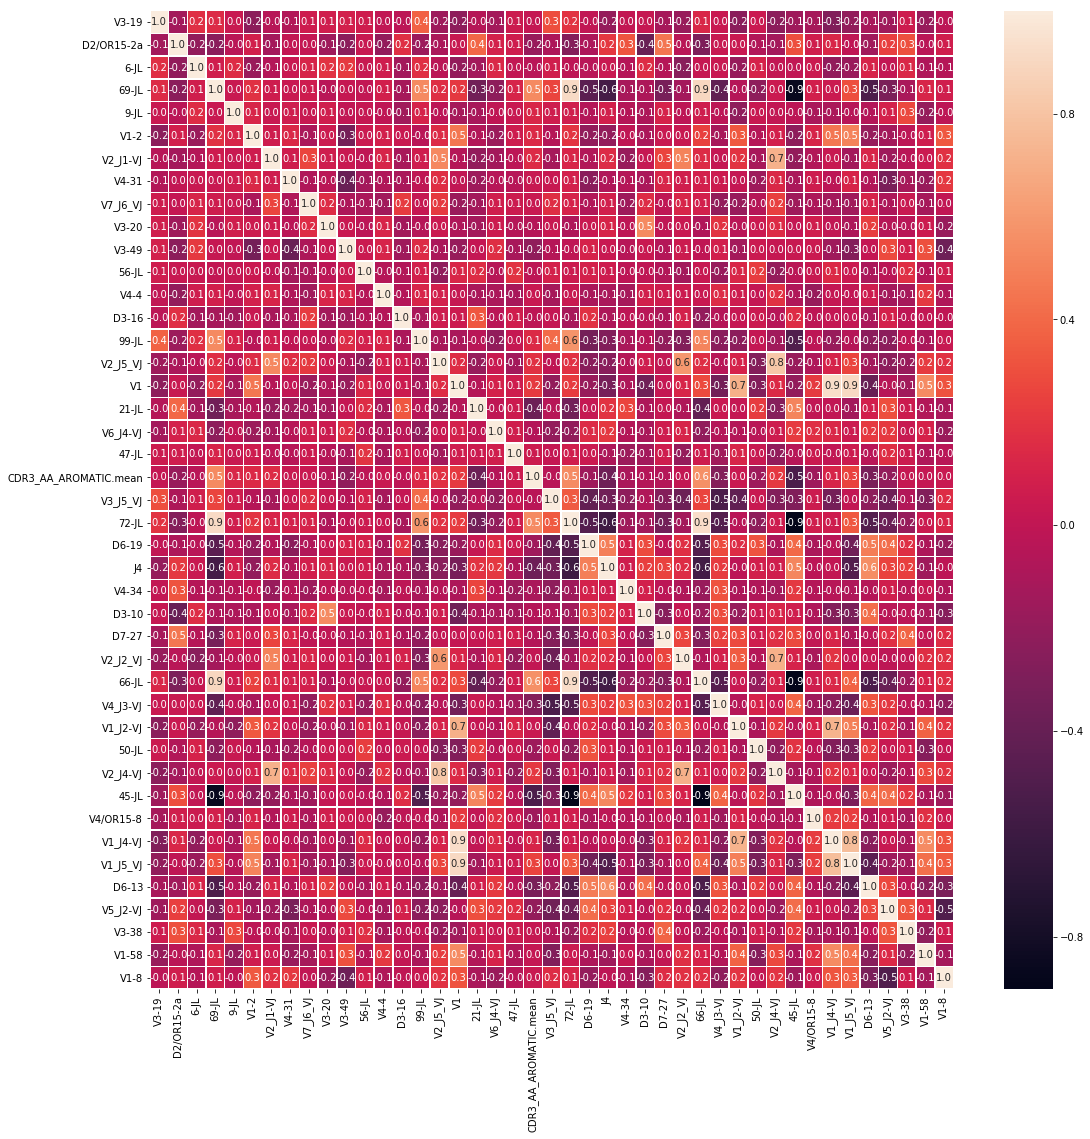

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
t = df.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean'}]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


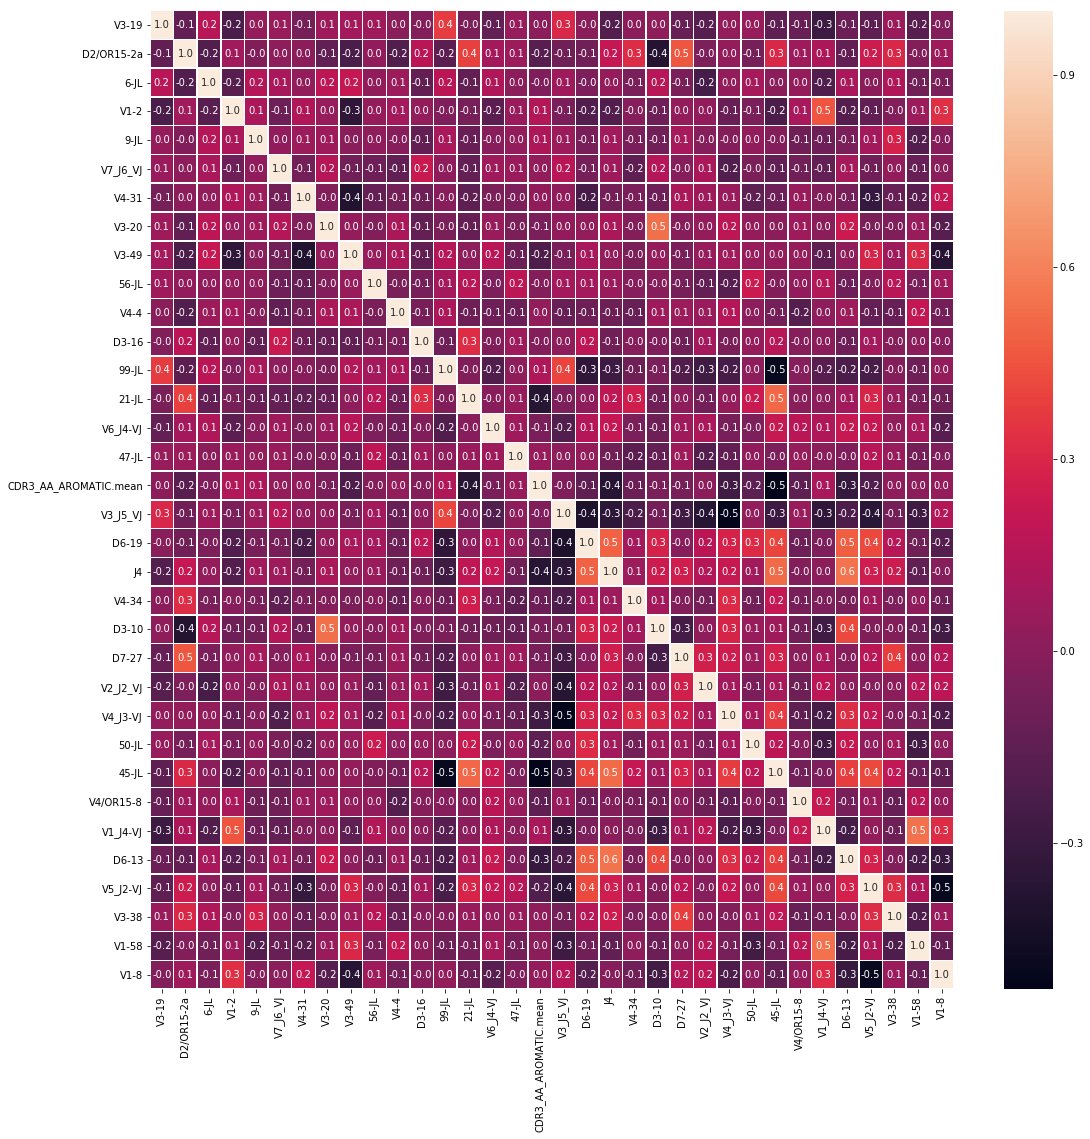

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
t = df.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V1-8',
       'J4', 'D7-27', 'V1-58', 'V4_J3-VJ', 'D6-13', 'D3-16', '21-JL',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ',
       'CDR3_AA_AROMATIC.mean'}]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

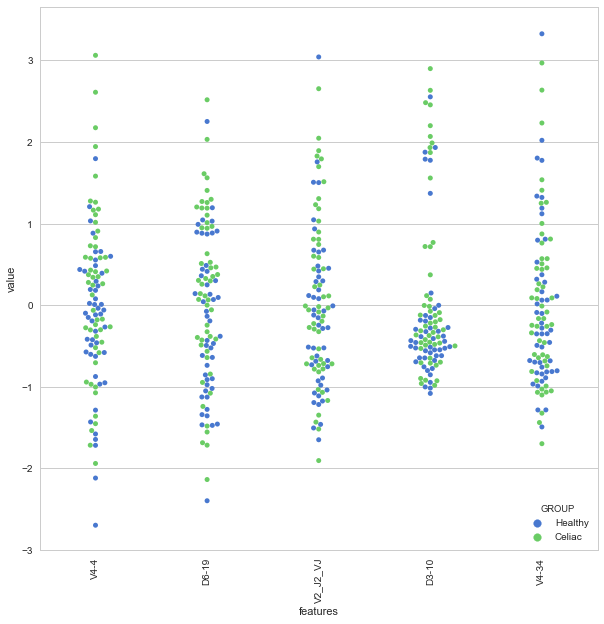

In [118]:
# see variance more clear.
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.loc[:,{feature_list[0],feature_list[1],feature_list[2],feature_list[3],feature_list[4]}]],axis=1)
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="GROUP", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

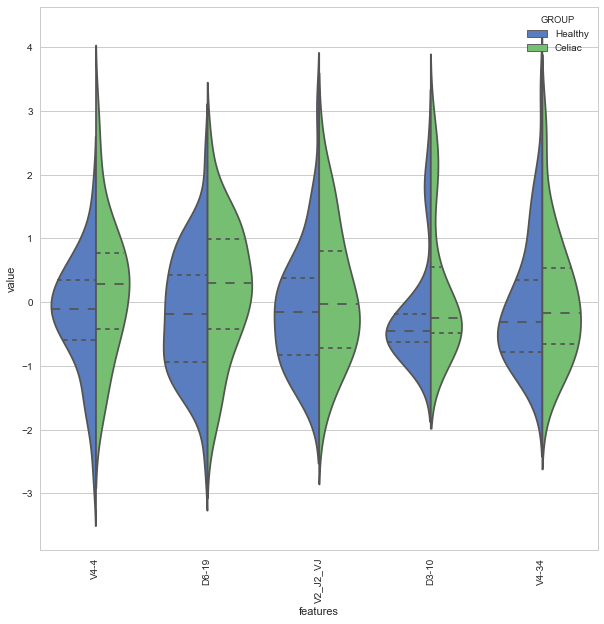

In [115]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.loc[:,{feature_list[0],feature_list[1],feature_list[2],feature_list[3],feature_list[4]}]],axis=1)
# {feature_list[0],feature_list[1],feature_list[2],feature_list[3],feature_list[4],feature_list[5],feature_list[6],feature_list[7],feature_list[8]}
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="GROUP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

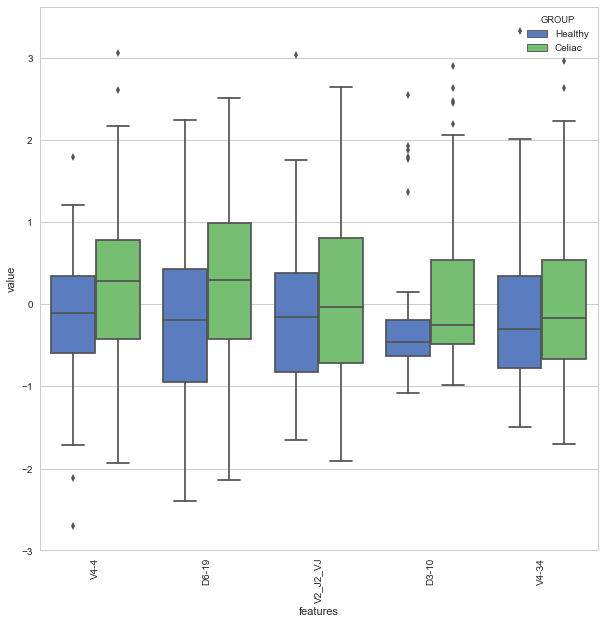

In [116]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="GROUP", data=data)
plt.xticks(rotation=90)

## feature selected visualize 2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

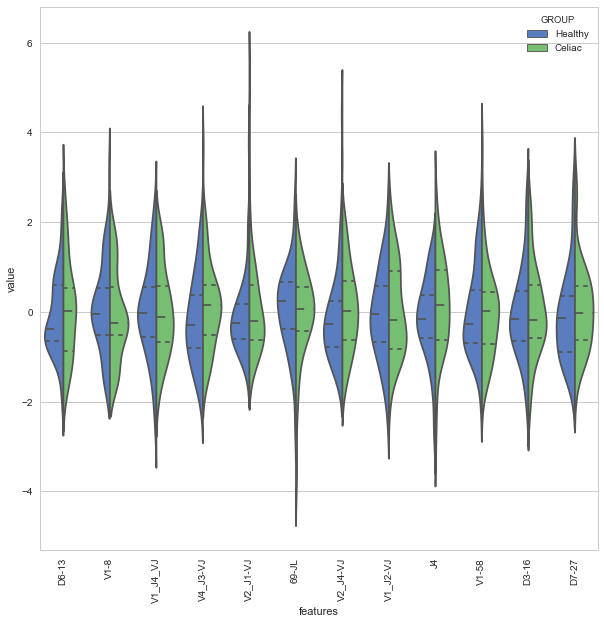

In [133]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.loc[:,{feature_list[5],feature_list[6],feature_list[7],feature_list[8],feature_list[9],feature_list[10],feature_list[11],feature_list[12],feature_list[13],feature_list[14],feature_list[15],feature_list[16]}]],axis=1)
# {feature_list[0],feature_list[1],feature_list[2],feature_list[3],feature_list[4],feature_list[5],feature_list[6],feature_list[7],feature_list[8]}
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="GROUP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

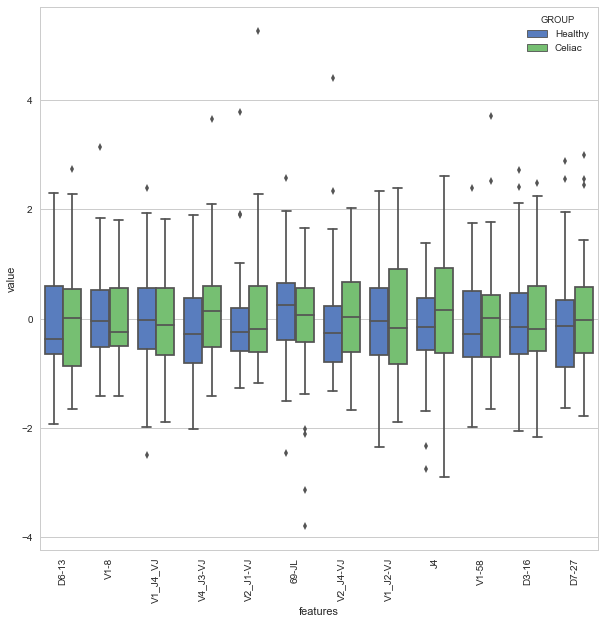

In [134]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="GROUP", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

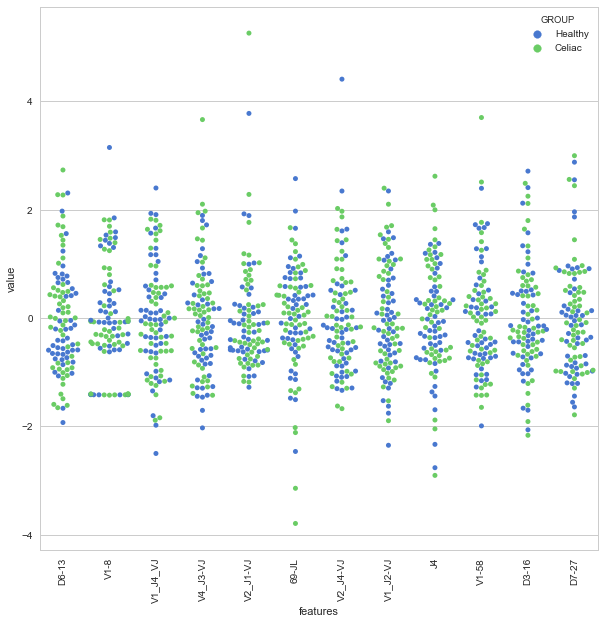

In [136]:
# see variance more clear.
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.loc[:,{feature_list[5],feature_list[6],feature_list[7],feature_list[8],feature_list[9],feature_list[10],feature_list[11],feature_list[12],feature_list[13],feature_list[14],feature_list[15],feature_list[16]}]],axis=1)
data = pd.melt(data,id_vars="GROUP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="GROUP", data=data)

plt.xticks(rotation=90)

## see all combination 

In [147]:
df.iloc[:,20:30]

V1-3   V1-38-4     V1-45     V1-46     V1-58     V1-68     V1-69   V1-69-2      V1-8    V1-NL1
0   0.021132       NaN  0.000076  0.020877  0.002855       NaN  0.104206  0.002167  0.015167       NaN
1   0.011166       NaN  0.000308  0.025104  0.003523  0.000019  0.089791       NaN  0.015864  0.000019
2   0.012480       NaN  0.000149  0.024041  0.002735       NaN  0.062999  0.001566  0.032295       NaN
3   0.028703       NaN  0.000174  0.022087  0.005482       NaN  0.081441       NaN       NaN  0.000015
4   0.010226       NaN  0.000107  0.018799  0.004998       NaN  0.115318  0.001423  0.021644  0.000018
5   0.009082       NaN       NaN  0.012935  0.000949       NaN  0.030189       NaN  0.009702       NaN
6   0.012069       NaN  0.000190  0.014041  0.003564       NaN  0.132478  0.003516  0.019482       NaN
7   0.000295       NaN  0.000157  0.030039  0.005571       NaN  0.153386  0.001969  0.020846       NaN
8   0.021509       NaN  0.000177  0.020713  0.003801       NaN  0.083883  0.001090  0.017089       NaN
9   0.018723       NaN  0.000205  0.033035  0.002539       NaN  0.044474       NaN  0.000282       NaN
10  0.018884       NaN  0.000087  0.031445  0.003905  0.000029  0.076062       NaN  0.000204       NaN
11  0.008629       NaN  0.000067  0.019638  0.003736       NaN  0.086983  0.001779  0.015168       NaN
12  0.010960       NaN  0.000055  0.020843  0.002954       NaN  0.062612  0.001298  0.012533       NaN
13  0.010104       NaN  0.000281  0.030452  0.003508       NaN  0.094162  0.001965  0.014875       NaN
14  0.008437       NaN       NaN  0.028793  0.002678       NaN  0.035623  0.000134  0.014999       NaN
15  0.006217       NaN       NaN  0.015431  0.002609       NaN  0.096248  0.001887  0.021314       NaN
16  0.009880       NaN       NaN  0.013174  0.001647       NaN  0.069012  0.001497  0.010479       NaN
17  0.011897       NaN       NaN  0.018594  0.001655       NaN  0.022376       NaN  0.021431       NaN
18  0.008286       NaN  0.000254  0.022699  0.005365       NaN  0.092257  0.003841  0.010191       NaN
19  0.010217       NaN  0.000330  0.020763  0.003296       NaN  0.044868       NaN  0.031262       NaN
20  0.012011       NaN  0.000343  0.024708  0.001373       NaN  0.085106       NaN  0.010638  0.000343
21  0.010655       NaN  0.000234  0.026450  0.005000       NaN  0.071639       NaN  0.030282       NaN
22  0.010036       NaN  0.000256  0.014784  0.004407       NaN  0.114523  0.002559  0.035938       NaN
23  0.000280       NaN  0.000093  0.022719  0.003015       NaN  0.093051  0.001989  0.031763       NaN
24  0.005373       NaN  0.000087  0.016293  0.002788       NaN  0.044579       NaN  0.035896       NaN
25  0.025187       NaN  0.000296  0.031928  0.004963       NaN  0.090970       NaN  0.000370       NaN
26  0.020563       NaN  0.000087  0.016725  0.002704       NaN  0.071458  0.002464  0.000174       NaN
27  0.006894       NaN       NaN  0.015941  0.005601       NaN  0.061611       NaN  0.013141       NaN
28  0.020609       NaN  0.000097  0.022388  0.002912       NaN  0.029829       NaN  0.000291       NaN
29  0.024262  0.000034  0.000101  0.025614  0.004156       NaN  0.046937       NaN  0.012469       NaN
30  0.009901       NaN  0.000216  0.023614  0.004507       NaN  0.095582  0.001918  0.012154  0.000024
31  0.017399       NaN       NaN  0.022184       NaN       NaN  0.063506  0.002610       NaN       NaN
32  0.010185       NaN  0.000235  0.029350  0.002446       NaN  0.052602       NaN  0.000168       NaN
33  0.007092       NaN  0.000148  0.024970  0.002660       NaN  0.060579       NaN  0.015366       NaN
34  0.000334       NaN  0.000445  0.027611  0.002115       NaN  0.087174  0.001113  0.032175       NaN
35  0.010832       NaN  0.000122  0.021359  0.003834       NaN  0.135398  0.004138  0.017343       NaN
36  0.000299       NaN  0.000100  0.020850  0.003691       NaN  0.075319       NaN  0.031923       NaN
37  0.016379       NaN  0.000122  0.020724  0.004052       NaN  0.085557       NaN  0.010130  

In [7]:
# Create our imputer to replace missing values with the mean e.g.
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(df.iloc[:,3:])
df.iloc[:,3:] = imp.transform(df.iloc[:,3:])


In [208]:
y = df.columns.values[20:] 


h = [row[0:] for row in y]
h

['V1-3',
 'V1-38-4',
 'V1-45',
 'V1-46',
 'V1-58',
 'V1-68',
 'V1-69',
 'V1-69-2',
 'V1-8',
 'V1-NL1',
 'V1/OR15-1',
 'V1/OR15-2',
 'V1/OR15-3',
 'V1/OR15-4',
 'V1/OR15-5',
 'V1/OR15-9',
 'V2-10',
 'V2-26',
 'V2-5',
 'V2-70',
 'V2/OR16-5',
 'V3-11',
 'V3-13',
 'V3-15',
 'V3-16',
 'V3-19',
 'V3-20',
 'V3-21',
 'V3-22',
 'V3-23',
 'V3-30',
 'V3-30-3',
 'V3-30-33',
 'V3-33',
 'V3-35',
 'V3-38',
 'V3-38-3',
 'V3-43',
 'V3-47',
 'V3-48',
 'V3-49',
 'V3-52',
 'V3-53',
 'V3-54',
 'V3-64',
 'V3-66',
 'V3-69-1',
 'V3-7',
 'V3-71',
 'V3-72',
 'V3-73',
 'V3-74',
 'V3-9',
 'V3-NL1',
 'V3/OR15-7',
 'V3/OR16-10',
 'V3/OR16-12',
 'V3/OR16-13',
 'V3/OR16-15',
 'V3/OR16-6',
 'V3/OR16-8',
 'V3/OR16-9',
 'V4-28',
 'V4-30-2',
 'V4-30-4',
 'V4-31',
 'V4-34',
 'V4-38-2',
 'V4-39',
 'V4-4',
 'V4-55',
 'V4-59',
 'V4-61',
 'V4/OR15-8',
 'V5-10-1',
 'V5-51',
 'V5-78',
 'V6-1',
 'V7-34-1',
 'V7-4-1',
 'V7-40',
 'V7-81',
 'D1-1',
 'D1-14',
 'D1-20',
 'D1-26',
 'D1-7',
 'D1/OR15-1a',
 'D2-15',
 'D2-2',
 'D2-21',
 

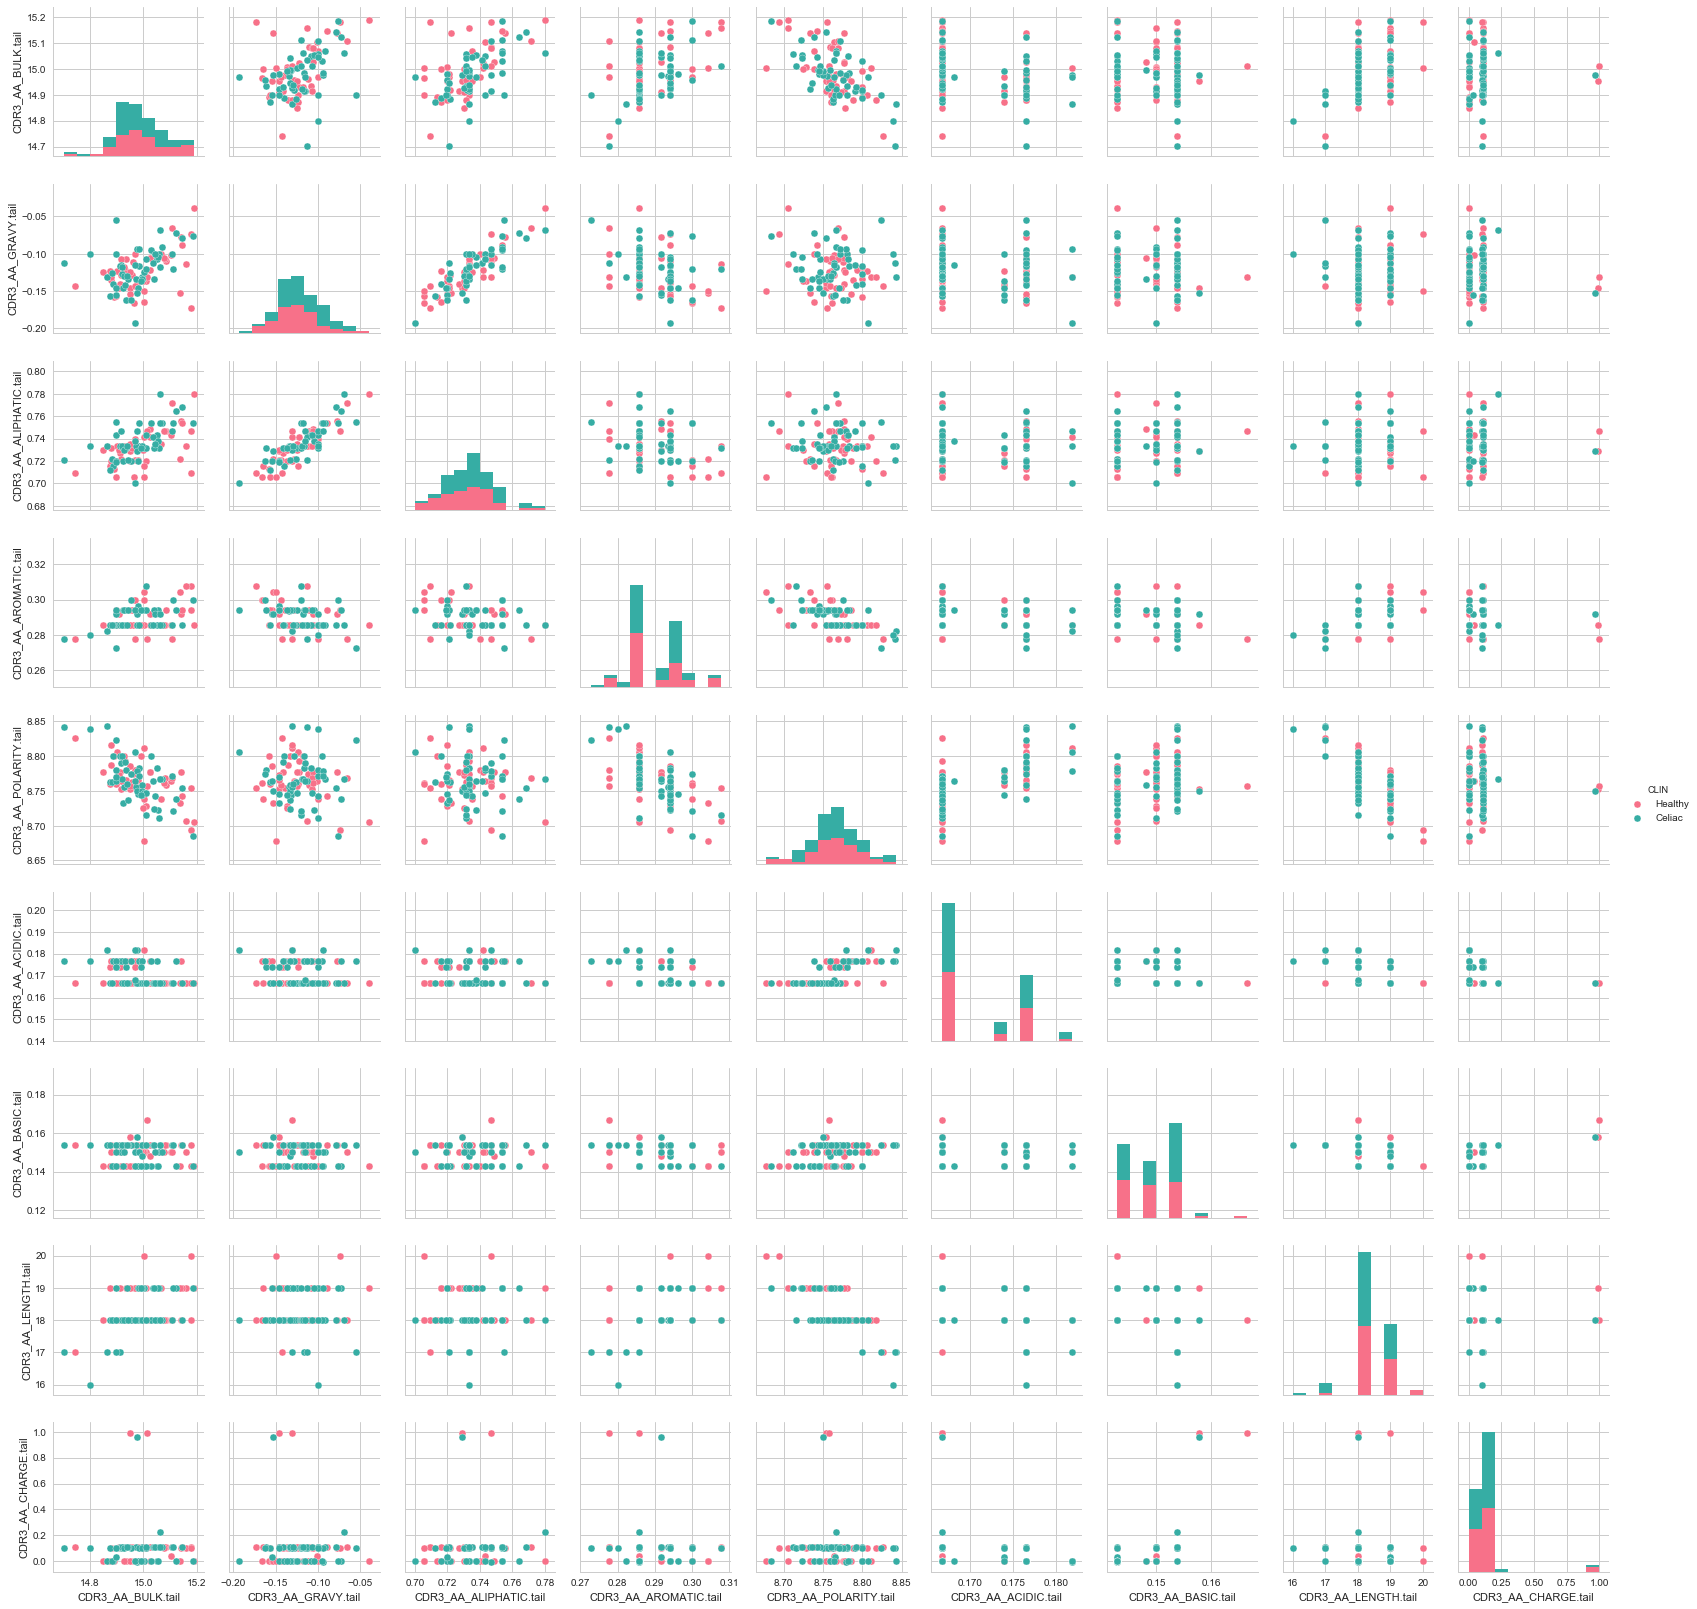

In [211]:
sns.pairplot(df.loc[:,{'CLIN',
 'CDR3_AA_ACIDIC.tail',
 'CDR3_AA_ALIPHATIC.tail',
 'CDR3_AA_AROMATIC.tail',
 'CDR3_AA_BASIC.tail',
 'CDR3_AA_BULK.tail',
 'CDR3_AA_CHARGE.tail',
 'CDR3_AA_GRAVY.tail',
 'CDR3_AA_LENGTH.tail',
 'CDR3_AA_POLARITY.tail'
 }],hue='CLIN',palette='husl')

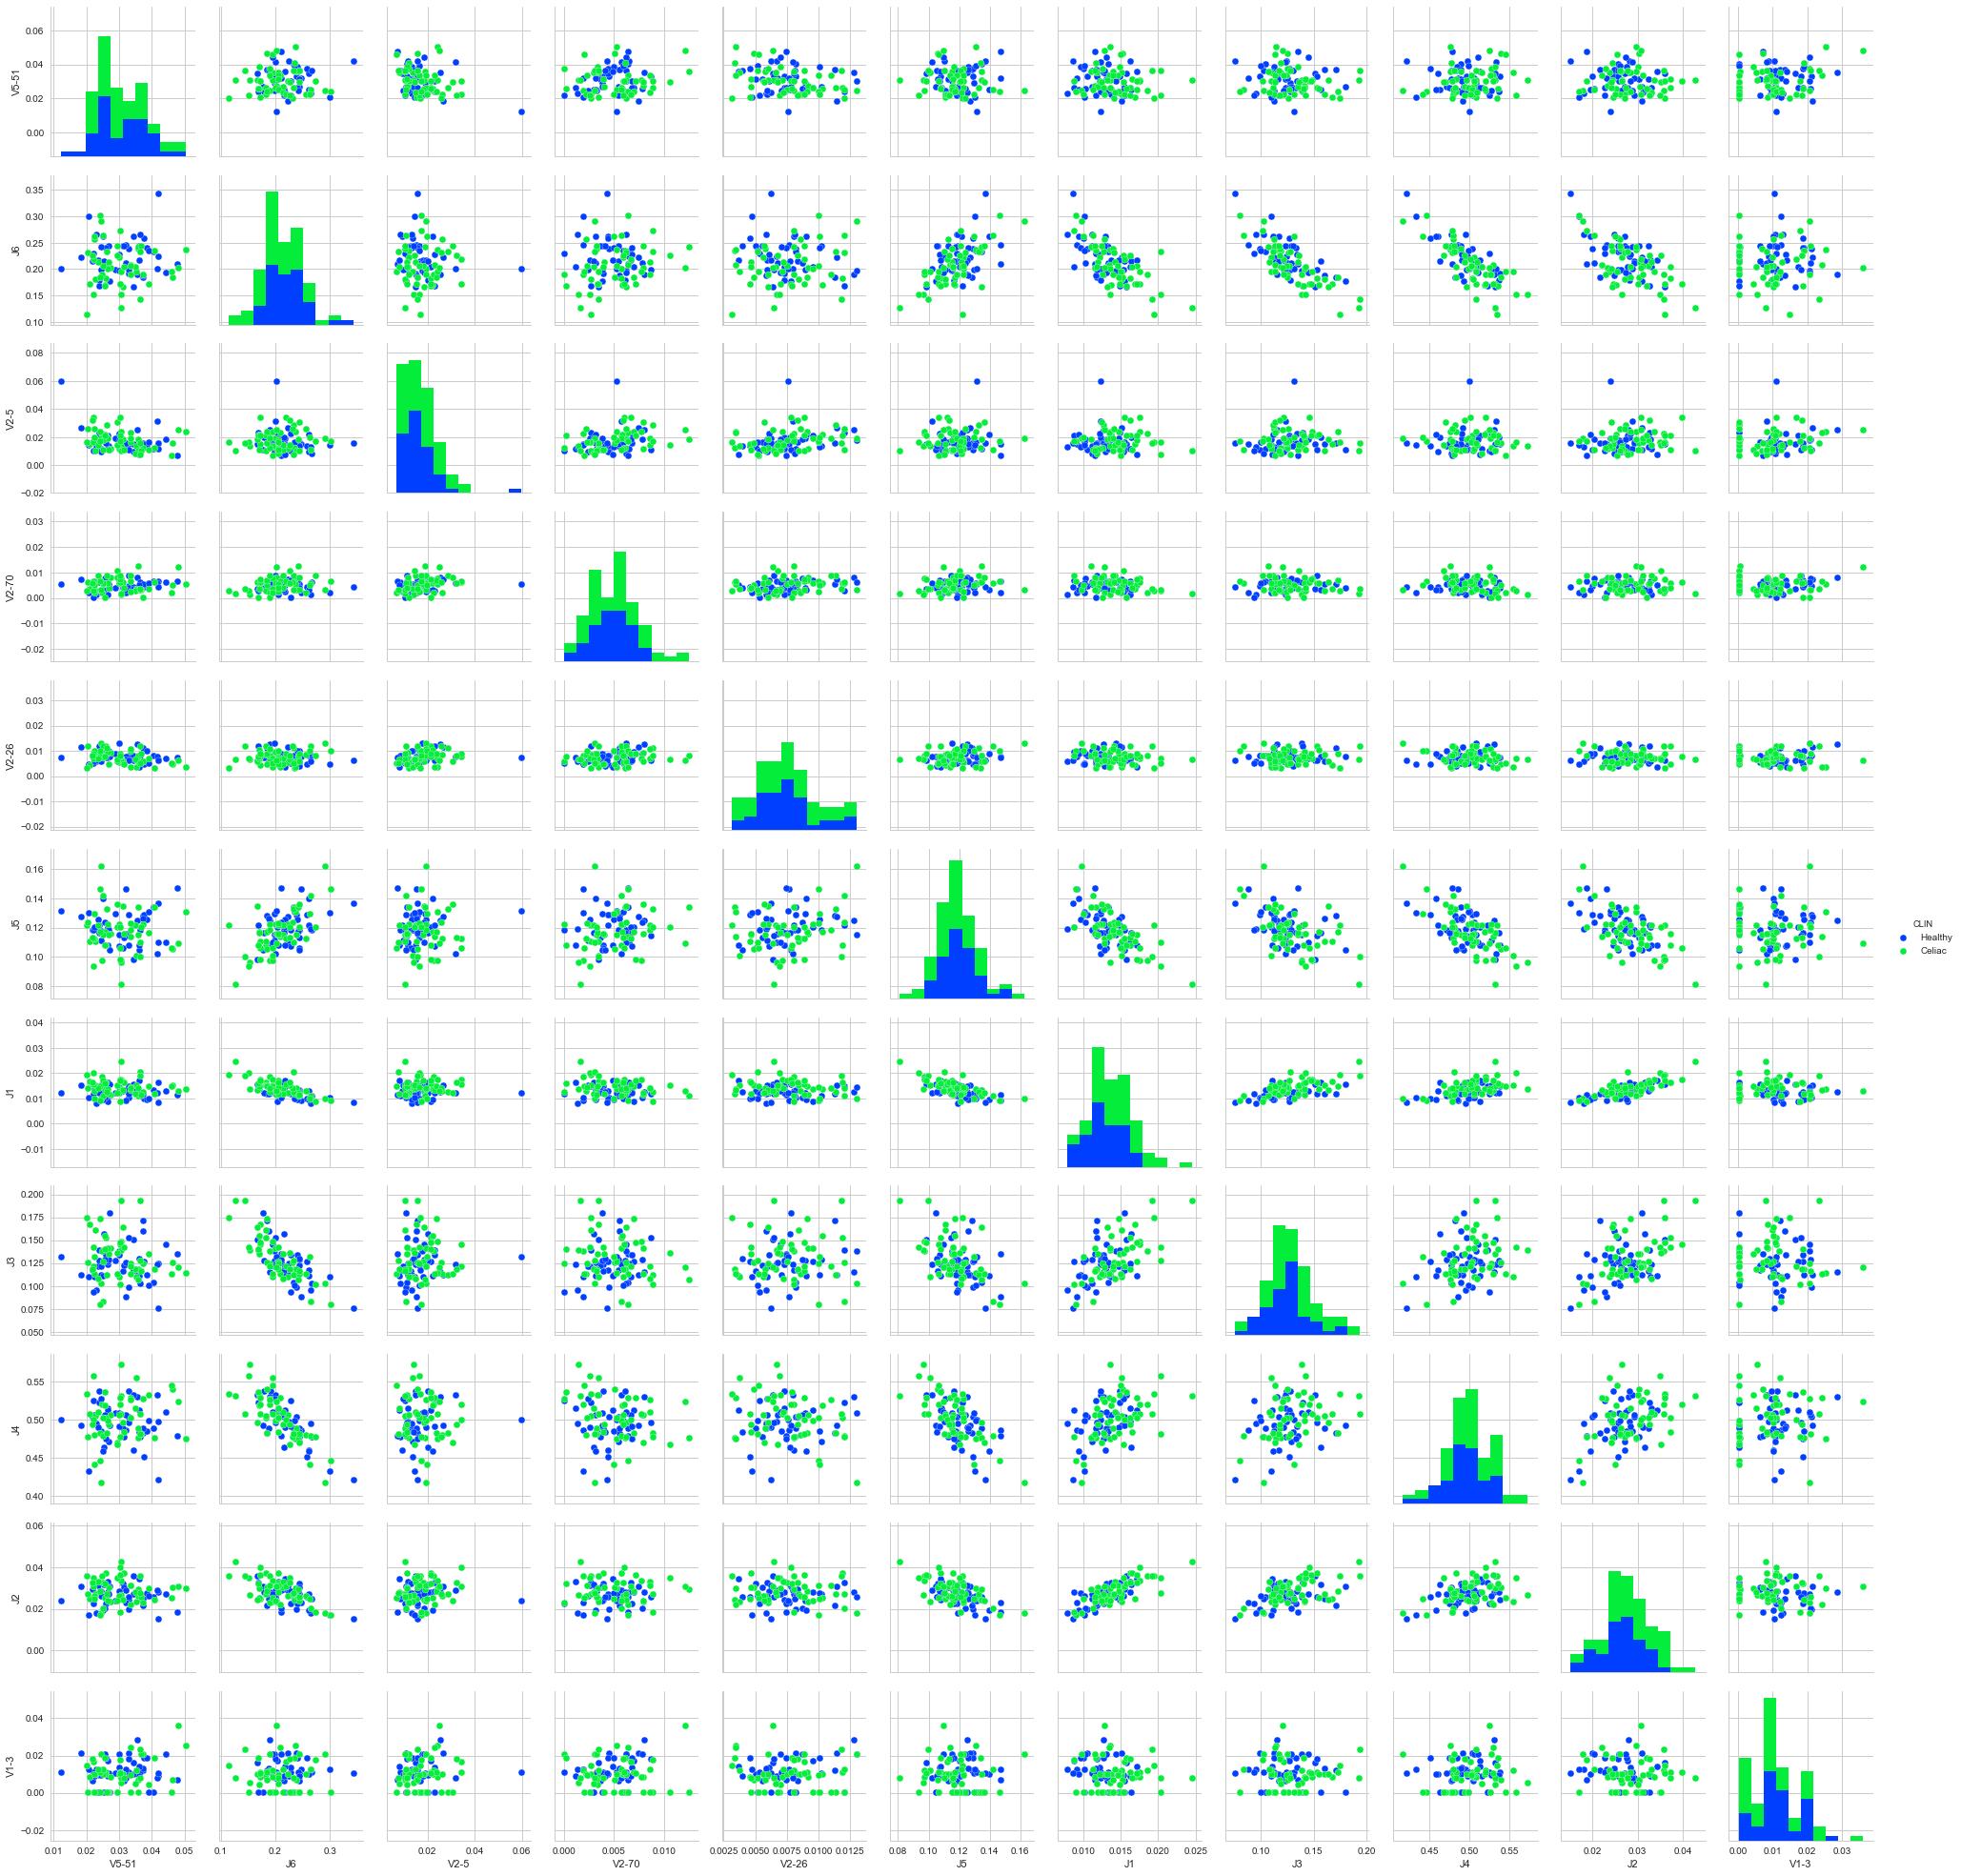

In [210]:
sns.pairplot(df.loc[:,{'CLIN','V1-3',
'J1',
 'J2',
 'J3',
 'J4',
 'J5',
 'J6',
 'V5-51',
 'V2-26',
 'V2-5',
 'V2-70',
 'V2-70'}],hue='CLIN',palette='bright')

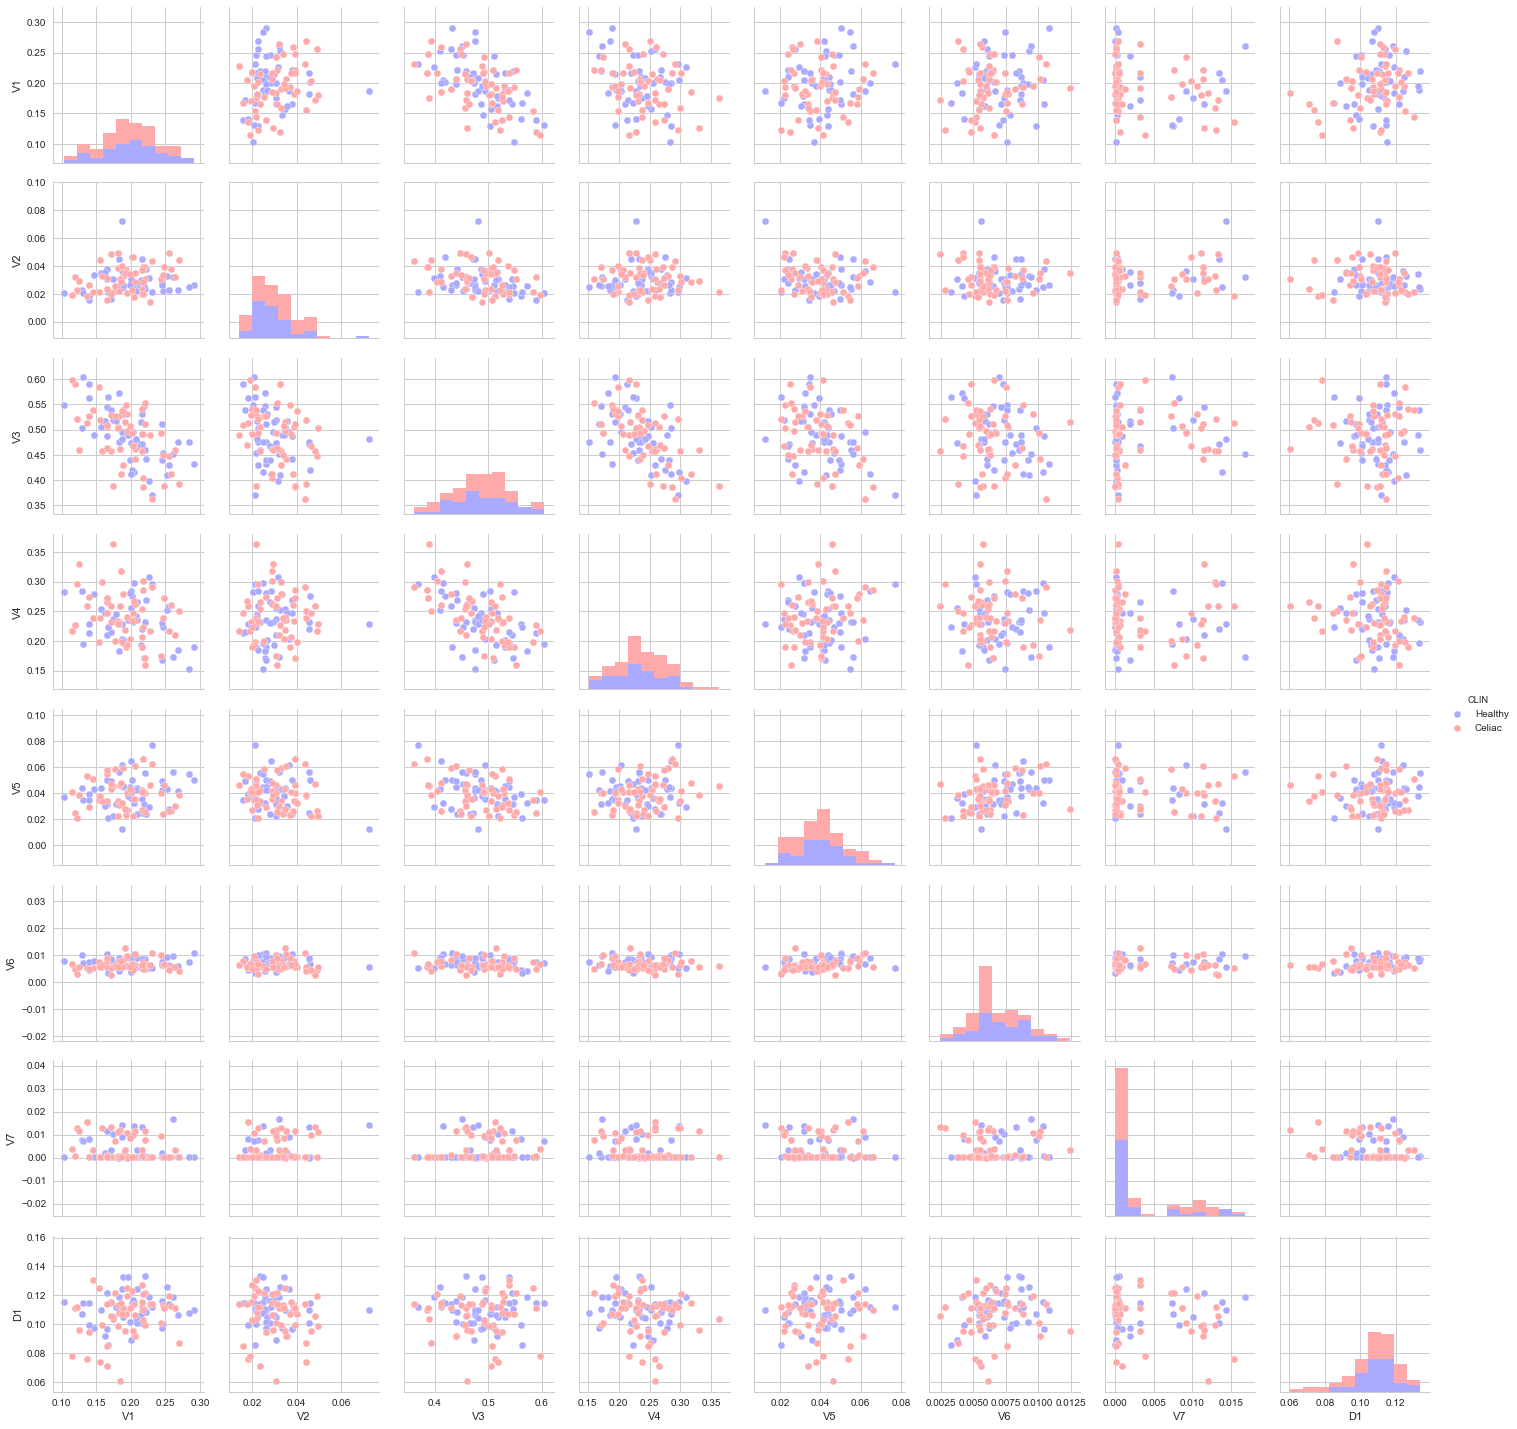

In [157]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:11],hue='CLIN',palette='bwr')

In [161]:
import seaborn as sns
sns.pairplot(df.loc[:,{'CLIN',('CDR3_AA_ACIDIC.mean':'CDR3_AA_POLARITY.tail')}],hue='CLIN',palette='bwr')

SyntaxError: invalid syntax (<ipython-input-161-9d9bf5d3362f>, line 2)

In [162]:
H = df[df.loc[:,{'CLIN','CDR3_AA_ACIDIC.mean':'CDR3_AA_POLARITY.tail'}]]

SyntaxError: invalid syntax (<ipython-input-162-d059fde3fc9d>, line 1)

In [163]:
df2= DataFrame(df)

NameError: name 'DataFrame' is not defined

In [165]:
J = df.loc[:,('CLIN':'V6', 'CDR3_AA_ACIDIC.mean')]

SyntaxError: invalid syntax (<ipython-input-165-fe651f260911>, line 1)

SyntaxError: invalid syntax (<ipython-input-168-7589e9784c7d>, line 1)